In [23]:
# import required libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz

In [2]:
# Load the dataset
data = pd.read_csv("parkinsons.data")  # Replace with your actual dataset filename

# Separate features and target
X = data.drop(['name', 'status'], axis=1)  # Remove 'name' and 'status' columns
y = data['status']

In [3]:
# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First, split the data into train_val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Next, split the train_val set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Now you have X_train, X_val, X_test, y_train, y_val, and y_test

In [4]:
# Analysis of train-test split

train_status_counts = y_train.value_counts()
test_status_counts = y_test.value_counts()

print("Train set status distribution:")
print(train_status_counts)

print("\nTest set status distribution:")
print(test_status_counts)

# status explanation:
# 0 = healthy 
# 1 = non-healthy (PD - Parkinson's disease)

Train set status distribution:
1    88
0    29
Name: status, dtype: int64

Test set status distribution:
1    32
0     7
Name: status, dtype: int64


In [5]:
# Scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [6]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Define hyperparameter distribution for random search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': range(100, 1000, 100),
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Perform random search using cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=3, random_state=42, verbose=2, error_score='raise')
random_search.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)])

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[0]	validation_0-logloss:0.64771
[1]	validation_0-logloss:0.61100
[2]	validation_0-logloss:0.57986
[3]	validation_0-logloss:0.55441
[4]	validation_0-logloss:0.53284
[5]	validation_0-logloss:0.51073
[6]	validation_0-logloss:0.49538
[7]	validation_0-logloss:0.47824
[8]	validation_0-logloss:0.46420
[9]	validation_0-logloss:0.45402
[10]	validation_0-logloss:0.44116
[11]	validation_0-logloss:0.43434
[12]	validation_0-logloss:0.42846
[13]	validation_0-logloss:0.42396
[14]	validation_0-logloss:0.41875
[15]	validation_0-logloss:0.41148
[16]	validation_0-logloss:0.41038
[17]	validation_0-logloss:0.40850
[18]	validation_0-logloss:0.40624
[19]	validation_0-logloss:0.40513
[20]	validation_0-logloss:0.40318
[21]	validation_0-logloss:0.40236
[22]	validation_0-logloss:0.40218
[23]	validation_0-logloss:0.40237
[24]	validation_0-logloss:0.40264
[25]	validation_0-logloss:0.40358
[26]	validation_0-logloss:0.40274
[27]	validation_0-logloss:0.4008

[236]	validation_0-logloss:0.33264
[237]	validation_0-logloss:0.33264
[238]	validation_0-logloss:0.33264
[239]	validation_0-logloss:0.33264
[240]	validation_0-logloss:0.33264
[241]	validation_0-logloss:0.33264
[242]	validation_0-logloss:0.33264
[243]	validation_0-logloss:0.33264
[244]	validation_0-logloss:0.33264
[245]	validation_0-logloss:0.33264
[246]	validation_0-logloss:0.33264
[247]	validation_0-logloss:0.33264
[248]	validation_0-logloss:0.33264
[249]	validation_0-logloss:0.33264
[250]	validation_0-logloss:0.33264
[251]	validation_0-logloss:0.33264
[252]	validation_0-logloss:0.33264
[253]	validation_0-logloss:0.33264
[254]	validation_0-logloss:0.33264
[255]	validation_0-logloss:0.33264
[256]	validation_0-logloss:0.33264
[257]	validation_0-logloss:0.33264
[258]	validation_0-logloss:0.33264
[259]	validation_0-logloss:0.33264
[260]	validation_0-logloss:0.33264
[261]	validation_0-logloss:0.33264
[262]	validation_0-logloss:0.33264
[263]	validation_0-logloss:0.33264
[264]	validation_0-l

[471]	validation_0-logloss:0.33264
[472]	validation_0-logloss:0.33264
[473]	validation_0-logloss:0.33264
[474]	validation_0-logloss:0.33264
[475]	validation_0-logloss:0.33264
[476]	validation_0-logloss:0.33264
[477]	validation_0-logloss:0.33264
[478]	validation_0-logloss:0.33264
[479]	validation_0-logloss:0.33264
[480]	validation_0-logloss:0.33264
[481]	validation_0-logloss:0.33264
[482]	validation_0-logloss:0.33264
[483]	validation_0-logloss:0.33264
[484]	validation_0-logloss:0.33264
[485]	validation_0-logloss:0.33264
[486]	validation_0-logloss:0.33264
[487]	validation_0-logloss:0.33264
[488]	validation_0-logloss:0.33264
[489]	validation_0-logloss:0.33264
[490]	validation_0-logloss:0.33264
[491]	validation_0-logloss:0.33264
[492]	validation_0-logloss:0.33264
[493]	validation_0-logloss:0.33264
[494]	validation_0-logloss:0.33264
[495]	validation_0-logloss:0.33264
[496]	validation_0-logloss:0.33264
[497]	validation_0-logloss:0.33264
[498]	validation_0-logloss:0.33264
[499]	validation_0-l

[706]	validation_0-logloss:0.33264
[707]	validation_0-logloss:0.33264
[708]	validation_0-logloss:0.33264
[709]	validation_0-logloss:0.33264
[710]	validation_0-logloss:0.33264
[711]	validation_0-logloss:0.33264
[712]	validation_0-logloss:0.33264
[713]	validation_0-logloss:0.33264
[714]	validation_0-logloss:0.33264
[715]	validation_0-logloss:0.33264
[716]	validation_0-logloss:0.33264
[717]	validation_0-logloss:0.33264
[718]	validation_0-logloss:0.33264
[719]	validation_0-logloss:0.33264
[720]	validation_0-logloss:0.33264
[721]	validation_0-logloss:0.33264
[722]	validation_0-logloss:0.33264
[723]	validation_0-logloss:0.33264
[724]	validation_0-logloss:0.33264
[725]	validation_0-logloss:0.33264
[726]	validation_0-logloss:0.33264
[727]	validation_0-logloss:0.33264
[728]	validation_0-logloss:0.33264
[729]	validation_0-logloss:0.33264
[730]	validation_0-logloss:0.33264
[731]	validation_0-logloss:0.33264
[732]	validation_0-logloss:0.33264
[733]	validation_0-logloss:0.33264
[734]	validation_0-l

[140]	validation_0-logloss:0.20349
[141]	validation_0-logloss:0.20349
[142]	validation_0-logloss:0.20349
[143]	validation_0-logloss:0.20349
[144]	validation_0-logloss:0.20349
[145]	validation_0-logloss:0.20349
[146]	validation_0-logloss:0.20349
[147]	validation_0-logloss:0.20349
[148]	validation_0-logloss:0.20349
[149]	validation_0-logloss:0.20349
[150]	validation_0-logloss:0.20349
[151]	validation_0-logloss:0.20349
[152]	validation_0-logloss:0.20349
[153]	validation_0-logloss:0.20349
[154]	validation_0-logloss:0.20349
[155]	validation_0-logloss:0.20349
[156]	validation_0-logloss:0.20349
[157]	validation_0-logloss:0.20349
[158]	validation_0-logloss:0.20349
[159]	validation_0-logloss:0.20349
[160]	validation_0-logloss:0.20349
[161]	validation_0-logloss:0.20349
[162]	validation_0-logloss:0.20349
[163]	validation_0-logloss:0.20349
[164]	validation_0-logloss:0.20349
[165]	validation_0-logloss:0.20349
[166]	validation_0-logloss:0.20349
[167]	validation_0-logloss:0.20349
[168]	validation_0-l

[374]	validation_0-logloss:0.20349
[375]	validation_0-logloss:0.20349
[376]	validation_0-logloss:0.20349
[377]	validation_0-logloss:0.20349
[378]	validation_0-logloss:0.20349
[379]	validation_0-logloss:0.20349
[380]	validation_0-logloss:0.20349
[381]	validation_0-logloss:0.20349
[382]	validation_0-logloss:0.20349
[383]	validation_0-logloss:0.20349
[384]	validation_0-logloss:0.20349
[385]	validation_0-logloss:0.20349
[386]	validation_0-logloss:0.20349
[387]	validation_0-logloss:0.20349
[388]	validation_0-logloss:0.20349
[389]	validation_0-logloss:0.20349
[390]	validation_0-logloss:0.20349
[391]	validation_0-logloss:0.20349
[392]	validation_0-logloss:0.20349
[393]	validation_0-logloss:0.20349
[394]	validation_0-logloss:0.20349
[395]	validation_0-logloss:0.20349
[396]	validation_0-logloss:0.20349
[397]	validation_0-logloss:0.20349
[398]	validation_0-logloss:0.20349
[399]	validation_0-logloss:0.20349
[400]	validation_0-logloss:0.20349
[401]	validation_0-logloss:0.20349
[402]	validation_0-l

[609]	validation_0-logloss:0.20349
[610]	validation_0-logloss:0.20349
[611]	validation_0-logloss:0.20349
[612]	validation_0-logloss:0.20349
[613]	validation_0-logloss:0.20349
[614]	validation_0-logloss:0.20349
[615]	validation_0-logloss:0.20349
[616]	validation_0-logloss:0.20349
[617]	validation_0-logloss:0.20349
[618]	validation_0-logloss:0.20349
[619]	validation_0-logloss:0.20349
[620]	validation_0-logloss:0.20349
[621]	validation_0-logloss:0.20349
[622]	validation_0-logloss:0.20349
[623]	validation_0-logloss:0.20349
[624]	validation_0-logloss:0.20349
[625]	validation_0-logloss:0.20349
[626]	validation_0-logloss:0.20349
[627]	validation_0-logloss:0.20349
[628]	validation_0-logloss:0.20349
[629]	validation_0-logloss:0.20349
[630]	validation_0-logloss:0.20349
[631]	validation_0-logloss:0.20349
[632]	validation_0-logloss:0.20349
[633]	validation_0-logloss:0.20349
[634]	validation_0-logloss:0.20349
[635]	validation_0-logloss:0.20349
[636]	validation_0-logloss:0.20349
[637]	validation_0-l

[41]	validation_0-logloss:0.24298
[42]	validation_0-logloss:0.23810
[43]	validation_0-logloss:0.23712
[44]	validation_0-logloss:0.23551
[45]	validation_0-logloss:0.23094
[46]	validation_0-logloss:0.22959
[47]	validation_0-logloss:0.22995
[48]	validation_0-logloss:0.22784
[49]	validation_0-logloss:0.22827
[50]	validation_0-logloss:0.22386
[51]	validation_0-logloss:0.21977
[52]	validation_0-logloss:0.22077
[53]	validation_0-logloss:0.22218
[54]	validation_0-logloss:0.21838
[55]	validation_0-logloss:0.21637
[56]	validation_0-logloss:0.21530
[57]	validation_0-logloss:0.21439
[58]	validation_0-logloss:0.21625
[59]	validation_0-logloss:0.21714
[60]	validation_0-logloss:0.21504
[61]	validation_0-logloss:0.21593
[62]	validation_0-logloss:0.21229
[63]	validation_0-logloss:0.21340
[64]	validation_0-logloss:0.21402
[65]	validation_0-logloss:0.21054
[66]	validation_0-logloss:0.20802
[67]	validation_0-logloss:0.20723
[68]	validation_0-logloss:0.20395
[69]	validation_0-logloss:0.20163
[70]	validatio

[277]	validation_0-logloss:0.20254
[278]	validation_0-logloss:0.20254
[279]	validation_0-logloss:0.20254
[280]	validation_0-logloss:0.20254
[281]	validation_0-logloss:0.20254
[282]	validation_0-logloss:0.20254
[283]	validation_0-logloss:0.20254
[284]	validation_0-logloss:0.20254
[285]	validation_0-logloss:0.20254
[286]	validation_0-logloss:0.20254
[287]	validation_0-logloss:0.20254
[288]	validation_0-logloss:0.20254
[289]	validation_0-logloss:0.20254
[290]	validation_0-logloss:0.20254
[291]	validation_0-logloss:0.20254
[292]	validation_0-logloss:0.20254
[293]	validation_0-logloss:0.20254
[294]	validation_0-logloss:0.20254
[295]	validation_0-logloss:0.20254
[296]	validation_0-logloss:0.20254
[297]	validation_0-logloss:0.20254
[298]	validation_0-logloss:0.20254
[299]	validation_0-logloss:0.20254
[300]	validation_0-logloss:0.20254
[301]	validation_0-logloss:0.20254
[302]	validation_0-logloss:0.20254
[303]	validation_0-logloss:0.20254
[304]	validation_0-logloss:0.20254
[305]	validation_0-l

[512]	validation_0-logloss:0.20234
[513]	validation_0-logloss:0.20234
[514]	validation_0-logloss:0.20234
[515]	validation_0-logloss:0.20234
[516]	validation_0-logloss:0.20234
[517]	validation_0-logloss:0.20234
[518]	validation_0-logloss:0.20234
[519]	validation_0-logloss:0.20234
[520]	validation_0-logloss:0.20234
[521]	validation_0-logloss:0.20234
[522]	validation_0-logloss:0.20234
[523]	validation_0-logloss:0.20234
[524]	validation_0-logloss:0.20234
[525]	validation_0-logloss:0.20234
[526]	validation_0-logloss:0.20234
[527]	validation_0-logloss:0.20234
[528]	validation_0-logloss:0.20234
[529]	validation_0-logloss:0.20234
[530]	validation_0-logloss:0.20234
[531]	validation_0-logloss:0.20234
[532]	validation_0-logloss:0.20234
[533]	validation_0-logloss:0.20234
[534]	validation_0-logloss:0.20234
[535]	validation_0-logloss:0.20234
[536]	validation_0-logloss:0.20234
[537]	validation_0-logloss:0.20234
[538]	validation_0-logloss:0.20234
[539]	validation_0-logloss:0.20234
[540]	validation_0-l

[747]	validation_0-logloss:0.20234
[748]	validation_0-logloss:0.20234
[749]	validation_0-logloss:0.20234
[750]	validation_0-logloss:0.20234
[751]	validation_0-logloss:0.20234
[752]	validation_0-logloss:0.20234
[753]	validation_0-logloss:0.20234
[754]	validation_0-logloss:0.20234
[755]	validation_0-logloss:0.20234
[756]	validation_0-logloss:0.20234
[757]	validation_0-logloss:0.20234
[758]	validation_0-logloss:0.20234
[759]	validation_0-logloss:0.20234
[760]	validation_0-logloss:0.20234
[761]	validation_0-logloss:0.20234
[762]	validation_0-logloss:0.20234
[763]	validation_0-logloss:0.20234
[764]	validation_0-logloss:0.20234
[765]	validation_0-logloss:0.20234
[766]	validation_0-logloss:0.20234
[767]	validation_0-logloss:0.20234
[768]	validation_0-logloss:0.20234
[769]	validation_0-logloss:0.20234
[770]	validation_0-logloss:0.20234
[771]	validation_0-logloss:0.20234
[772]	validation_0-logloss:0.20234
[773]	validation_0-logloss:0.20234
[774]	validation_0-logloss:0.20234
[775]	validation_0-l

[181]	validation_0-logloss:0.28418
[182]	validation_0-logloss:0.28391
[183]	validation_0-logloss:0.28357
[184]	validation_0-logloss:0.28337
[185]	validation_0-logloss:0.28463
[186]	validation_0-logloss:0.28590
[187]	validation_0-logloss:0.28612
[188]	validation_0-logloss:0.28689
[189]	validation_0-logloss:0.28732
[190]	validation_0-logloss:0.28843
[191]	validation_0-logloss:0.28875
[192]	validation_0-logloss:0.28898
[193]	validation_0-logloss:0.28874
[194]	validation_0-logloss:0.28780
[195]	validation_0-logloss:0.28883
[196]	validation_0-logloss:0.28896
[197]	validation_0-logloss:0.28882
[198]	validation_0-logloss:0.28946
[199]	validation_0-logloss:0.28858
[200]	validation_0-logloss:0.28793
[201]	validation_0-logloss:0.28780
[202]	validation_0-logloss:0.28742
[203]	validation_0-logloss:0.28761
[204]	validation_0-logloss:0.28819
[205]	validation_0-logloss:0.28854
[206]	validation_0-logloss:0.28738
[207]	validation_0-logloss:0.28749
[208]	validation_0-logloss:0.28825
[209]	validation_0-l

[416]	validation_0-logloss:0.28687
[417]	validation_0-logloss:0.28604
[418]	validation_0-logloss:0.28657
[419]	validation_0-logloss:0.28705
[420]	validation_0-logloss:0.28648
[421]	validation_0-logloss:0.28650
[422]	validation_0-logloss:0.28647
[423]	validation_0-logloss:0.28657
[424]	validation_0-logloss:0.28591
[425]	validation_0-logloss:0.28578
[426]	validation_0-logloss:0.28592
[427]	validation_0-logloss:0.28556
[428]	validation_0-logloss:0.28562
[429]	validation_0-logloss:0.28541
[430]	validation_0-logloss:0.28590
[431]	validation_0-logloss:0.28648
[432]	validation_0-logloss:0.28736
[433]	validation_0-logloss:0.28834
[434]	validation_0-logloss:0.28838
[435]	validation_0-logloss:0.28850
[436]	validation_0-logloss:0.28850
[437]	validation_0-logloss:0.28841
[438]	validation_0-logloss:0.28785
[439]	validation_0-logloss:0.28738
[440]	validation_0-logloss:0.28772
[441]	validation_0-logloss:0.28857
[442]	validation_0-logloss:0.28859
[443]	validation_0-logloss:0.28797
[444]	validation_0-l

[651]	validation_0-logloss:0.28291
[652]	validation_0-logloss:0.28287
[653]	validation_0-logloss:0.28259
[654]	validation_0-logloss:0.28155
[655]	validation_0-logloss:0.28188
[656]	validation_0-logloss:0.28150
[657]	validation_0-logloss:0.28122
[658]	validation_0-logloss:0.28099
[659]	validation_0-logloss:0.28105
[660]	validation_0-logloss:0.28218
[661]	validation_0-logloss:0.28229
[662]	validation_0-logloss:0.28272
[663]	validation_0-logloss:0.28315
[664]	validation_0-logloss:0.28256
[665]	validation_0-logloss:0.28339
[666]	validation_0-logloss:0.28394
[667]	validation_0-logloss:0.28536
[668]	validation_0-logloss:0.28548
[669]	validation_0-logloss:0.28522
[670]	validation_0-logloss:0.28527
[671]	validation_0-logloss:0.28437
[672]	validation_0-logloss:0.28429
[673]	validation_0-logloss:0.28365
[674]	validation_0-logloss:0.28365
[675]	validation_0-logloss:0.28428
[676]	validation_0-logloss:0.28437
[677]	validation_0-logloss:0.28429
[678]	validation_0-logloss:0.28336
[679]	validation_0-l

[886]	validation_0-logloss:0.28261
[887]	validation_0-logloss:0.28253
[888]	validation_0-logloss:0.28338
[889]	validation_0-logloss:0.28272
[890]	validation_0-logloss:0.28295
[891]	validation_0-logloss:0.28281
[892]	validation_0-logloss:0.28320
[893]	validation_0-logloss:0.28314
[894]	validation_0-logloss:0.28293
[895]	validation_0-logloss:0.28268
[896]	validation_0-logloss:0.28233
[897]	validation_0-logloss:0.28230
[898]	validation_0-logloss:0.28187
[899]	validation_0-logloss:0.28192
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=900, subsample=0.9; total time=   1.7s
[0]	validation_0-logloss:0.61476
[1]	validation_0-logloss:0.52892
[2]	validation_0-logloss:0.49196
[3]	validation_0-logloss:0.46651
[4]	validation_0-logloss:0.42699
[5]	validation_0-logloss:0.39805
[6]	validation_0-logloss:0.38578
[7]	validation_0-logloss:0.36631
[8]	validation_0-logloss:0.34913
[9]	validation_0-logloss:0.33719
[10]	validation_0-logloss:0.32176
[11]	validation_0-logl

[220]	validation_0-logloss:0.15512
[221]	validation_0-logloss:0.15580
[222]	validation_0-logloss:0.15570
[223]	validation_0-logloss:0.15574
[224]	validation_0-logloss:0.15519
[225]	validation_0-logloss:0.15471
[226]	validation_0-logloss:0.15425
[227]	validation_0-logloss:0.15491
[228]	validation_0-logloss:0.15518
[229]	validation_0-logloss:0.15524
[230]	validation_0-logloss:0.15510
[231]	validation_0-logloss:0.15502
[232]	validation_0-logloss:0.15503
[233]	validation_0-logloss:0.15566
[234]	validation_0-logloss:0.15583
[235]	validation_0-logloss:0.15590
[236]	validation_0-logloss:0.15540
[237]	validation_0-logloss:0.15540
[238]	validation_0-logloss:0.15498
[239]	validation_0-logloss:0.15519
[240]	validation_0-logloss:0.15439
[241]	validation_0-logloss:0.15479
[242]	validation_0-logloss:0.15428
[243]	validation_0-logloss:0.15407
[244]	validation_0-logloss:0.15440
[245]	validation_0-logloss:0.15442
[246]	validation_0-logloss:0.15471
[247]	validation_0-logloss:0.15483
[248]	validation_0-l

[455]	validation_0-logloss:0.16061
[456]	validation_0-logloss:0.16070
[457]	validation_0-logloss:0.16082
[458]	validation_0-logloss:0.16024
[459]	validation_0-logloss:0.16077
[460]	validation_0-logloss:0.16055
[461]	validation_0-logloss:0.16033
[462]	validation_0-logloss:0.16017
[463]	validation_0-logloss:0.16040
[464]	validation_0-logloss:0.16059
[465]	validation_0-logloss:0.16138
[466]	validation_0-logloss:0.16129
[467]	validation_0-logloss:0.16102
[468]	validation_0-logloss:0.16132
[469]	validation_0-logloss:0.16150
[470]	validation_0-logloss:0.16198
[471]	validation_0-logloss:0.16199
[472]	validation_0-logloss:0.16209
[473]	validation_0-logloss:0.16190
[474]	validation_0-logloss:0.16177
[475]	validation_0-logloss:0.16144
[476]	validation_0-logloss:0.16169
[477]	validation_0-logloss:0.16186
[478]	validation_0-logloss:0.16212
[479]	validation_0-logloss:0.16226
[480]	validation_0-logloss:0.16244
[481]	validation_0-logloss:0.16209
[482]	validation_0-logloss:0.16217
[483]	validation_0-l

[690]	validation_0-logloss:0.16323
[691]	validation_0-logloss:0.16380
[692]	validation_0-logloss:0.16383
[693]	validation_0-logloss:0.16361
[694]	validation_0-logloss:0.16352
[695]	validation_0-logloss:0.16383
[696]	validation_0-logloss:0.16394
[697]	validation_0-logloss:0.16335
[698]	validation_0-logloss:0.16255
[699]	validation_0-logloss:0.16280
[700]	validation_0-logloss:0.16298
[701]	validation_0-logloss:0.16343
[702]	validation_0-logloss:0.16344
[703]	validation_0-logloss:0.16372
[704]	validation_0-logloss:0.16309
[705]	validation_0-logloss:0.16309
[706]	validation_0-logloss:0.16326
[707]	validation_0-logloss:0.16313
[708]	validation_0-logloss:0.16300
[709]	validation_0-logloss:0.16318
[710]	validation_0-logloss:0.16298
[711]	validation_0-logloss:0.16264
[712]	validation_0-logloss:0.16292
[713]	validation_0-logloss:0.16245
[714]	validation_0-logloss:0.16309
[715]	validation_0-logloss:0.16255
[716]	validation_0-logloss:0.16241
[717]	validation_0-logloss:0.16273
[718]	validation_0-l

[22]	validation_0-logloss:0.24942
[23]	validation_0-logloss:0.24164
[24]	validation_0-logloss:0.24414
[25]	validation_0-logloss:0.24877
[26]	validation_0-logloss:0.25342
[27]	validation_0-logloss:0.24650
[28]	validation_0-logloss:0.24830
[29]	validation_0-logloss:0.24355
[30]	validation_0-logloss:0.23468
[31]	validation_0-logloss:0.23224
[32]	validation_0-logloss:0.23474
[33]	validation_0-logloss:0.23347
[34]	validation_0-logloss:0.23556
[35]	validation_0-logloss:0.23961
[36]	validation_0-logloss:0.24278
[37]	validation_0-logloss:0.23931
[38]	validation_0-logloss:0.23647
[39]	validation_0-logloss:0.23219
[40]	validation_0-logloss:0.23565
[41]	validation_0-logloss:0.23503
[42]	validation_0-logloss:0.23393
[43]	validation_0-logloss:0.23254
[44]	validation_0-logloss:0.23205
[45]	validation_0-logloss:0.23075
[46]	validation_0-logloss:0.23228
[47]	validation_0-logloss:0.23446
[48]	validation_0-logloss:0.23325
[49]	validation_0-logloss:0.23468
[50]	validation_0-logloss:0.23298
[51]	validatio

[259]	validation_0-logloss:0.34197
[260]	validation_0-logloss:0.34308
[261]	validation_0-logloss:0.34398
[262]	validation_0-logloss:0.34329
[263]	validation_0-logloss:0.34289
[264]	validation_0-logloss:0.34212
[265]	validation_0-logloss:0.34157
[266]	validation_0-logloss:0.34163
[267]	validation_0-logloss:0.34174
[268]	validation_0-logloss:0.34120
[269]	validation_0-logloss:0.34167
[270]	validation_0-logloss:0.34347
[271]	validation_0-logloss:0.34413
[272]	validation_0-logloss:0.34446
[273]	validation_0-logloss:0.34505
[274]	validation_0-logloss:0.34355
[275]	validation_0-logloss:0.34467
[276]	validation_0-logloss:0.34197
[277]	validation_0-logloss:0.34316
[278]	validation_0-logloss:0.34224
[279]	validation_0-logloss:0.34391
[280]	validation_0-logloss:0.34428
[281]	validation_0-logloss:0.34578
[282]	validation_0-logloss:0.34695
[283]	validation_0-logloss:0.34629
[284]	validation_0-logloss:0.34760
[285]	validation_0-logloss:0.34718
[286]	validation_0-logloss:0.34683
[287]	validation_0-l

[494]	validation_0-logloss:0.35081
[495]	validation_0-logloss:0.35023
[496]	validation_0-logloss:0.35011
[497]	validation_0-logloss:0.34921
[498]	validation_0-logloss:0.35029
[499]	validation_0-logloss:0.35123
[500]	validation_0-logloss:0.35174
[501]	validation_0-logloss:0.35031
[502]	validation_0-logloss:0.35076
[503]	validation_0-logloss:0.35169
[504]	validation_0-logloss:0.35378
[505]	validation_0-logloss:0.35365
[506]	validation_0-logloss:0.35447
[507]	validation_0-logloss:0.35495
[508]	validation_0-logloss:0.35446
[509]	validation_0-logloss:0.35583
[510]	validation_0-logloss:0.35496
[511]	validation_0-logloss:0.35386
[512]	validation_0-logloss:0.35335
[513]	validation_0-logloss:0.35223
[514]	validation_0-logloss:0.35406
[515]	validation_0-logloss:0.35319
[516]	validation_0-logloss:0.35224
[517]	validation_0-logloss:0.35420
[518]	validation_0-logloss:0.35229
[519]	validation_0-logloss:0.35218
[520]	validation_0-logloss:0.35281
[521]	validation_0-logloss:0.35339
[522]	validation_0-l

[729]	validation_0-logloss:0.35167
[730]	validation_0-logloss:0.35193
[731]	validation_0-logloss:0.35148
[732]	validation_0-logloss:0.35399
[733]	validation_0-logloss:0.35450
[734]	validation_0-logloss:0.35587
[735]	validation_0-logloss:0.35629
[736]	validation_0-logloss:0.35448
[737]	validation_0-logloss:0.35441
[738]	validation_0-logloss:0.35275
[739]	validation_0-logloss:0.35219
[740]	validation_0-logloss:0.35310
[741]	validation_0-logloss:0.35466
[742]	validation_0-logloss:0.35404
[743]	validation_0-logloss:0.35467
[744]	validation_0-logloss:0.35286
[745]	validation_0-logloss:0.35281
[746]	validation_0-logloss:0.35213
[747]	validation_0-logloss:0.35345
[748]	validation_0-logloss:0.35318
[749]	validation_0-logloss:0.35300
[750]	validation_0-logloss:0.35253
[751]	validation_0-logloss:0.35283
[752]	validation_0-logloss:0.35336
[753]	validation_0-logloss:0.35303
[754]	validation_0-logloss:0.35211
[755]	validation_0-logloss:0.35125
[756]	validation_0-logloss:0.35077
[757]	validation_0-l

[62]	validation_0-logloss:0.36694
[63]	validation_0-logloss:0.36435
[64]	validation_0-logloss:0.36468
[65]	validation_0-logloss:0.36155
[66]	validation_0-logloss:0.36036
[67]	validation_0-logloss:0.36131
[68]	validation_0-logloss:0.35841
[69]	validation_0-logloss:0.35721
[70]	validation_0-logloss:0.35354
[71]	validation_0-logloss:0.35254
[72]	validation_0-logloss:0.34948
[73]	validation_0-logloss:0.35149
[74]	validation_0-logloss:0.35265
[75]	validation_0-logloss:0.35322
[76]	validation_0-logloss:0.35454
[77]	validation_0-logloss:0.35147
[78]	validation_0-logloss:0.34812
[79]	validation_0-logloss:0.34708
[80]	validation_0-logloss:0.34821
[81]	validation_0-logloss:0.34948
[82]	validation_0-logloss:0.34877
[83]	validation_0-logloss:0.34718
[84]	validation_0-logloss:0.34830
[85]	validation_0-logloss:0.34884
[86]	validation_0-logloss:0.35004
[87]	validation_0-logloss:0.35012
[88]	validation_0-logloss:0.34860
[89]	validation_0-logloss:0.34978
[90]	validation_0-logloss:0.34988
[91]	validatio

[298]	validation_0-logloss:0.34647
[299]	validation_0-logloss:0.34647
[300]	validation_0-logloss:0.34647
[301]	validation_0-logloss:0.34647
[302]	validation_0-logloss:0.34647
[303]	validation_0-logloss:0.34647
[304]	validation_0-logloss:0.34647
[305]	validation_0-logloss:0.34647
[306]	validation_0-logloss:0.34647
[307]	validation_0-logloss:0.34647
[308]	validation_0-logloss:0.34647
[309]	validation_0-logloss:0.34646
[310]	validation_0-logloss:0.34646
[311]	validation_0-logloss:0.34646
[312]	validation_0-logloss:0.34646
[313]	validation_0-logloss:0.34646
[314]	validation_0-logloss:0.34646
[315]	validation_0-logloss:0.34646
[316]	validation_0-logloss:0.34646
[317]	validation_0-logloss:0.34646
[318]	validation_0-logloss:0.34646
[319]	validation_0-logloss:0.34646
[320]	validation_0-logloss:0.34646
[321]	validation_0-logloss:0.34646
[322]	validation_0-logloss:0.34646
[323]	validation_0-logloss:0.34646
[324]	validation_0-logloss:0.34646
[325]	validation_0-logloss:0.34646
[326]	validation_0-l

[533]	validation_0-logloss:0.34646
[534]	validation_0-logloss:0.34646
[535]	validation_0-logloss:0.34646
[536]	validation_0-logloss:0.34646
[537]	validation_0-logloss:0.34646
[538]	validation_0-logloss:0.34646
[539]	validation_0-logloss:0.34646
[540]	validation_0-logloss:0.34646
[541]	validation_0-logloss:0.34646
[542]	validation_0-logloss:0.34646
[543]	validation_0-logloss:0.34646
[544]	validation_0-logloss:0.34646
[545]	validation_0-logloss:0.34646
[546]	validation_0-logloss:0.34646
[547]	validation_0-logloss:0.34646
[548]	validation_0-logloss:0.34646
[549]	validation_0-logloss:0.34646
[550]	validation_0-logloss:0.34646
[551]	validation_0-logloss:0.34646
[552]	validation_0-logloss:0.34646
[553]	validation_0-logloss:0.34646
[554]	validation_0-logloss:0.34646
[555]	validation_0-logloss:0.34646
[556]	validation_0-logloss:0.34646
[557]	validation_0-logloss:0.34646
[558]	validation_0-logloss:0.34646
[559]	validation_0-logloss:0.34646
[560]	validation_0-logloss:0.34646
[561]	validation_0-l

[768]	validation_0-logloss:0.34646
[769]	validation_0-logloss:0.34646
[770]	validation_0-logloss:0.34646
[771]	validation_0-logloss:0.34646
[772]	validation_0-logloss:0.34646
[773]	validation_0-logloss:0.34646
[774]	validation_0-logloss:0.34646
[775]	validation_0-logloss:0.34646
[776]	validation_0-logloss:0.34646
[777]	validation_0-logloss:0.34646
[778]	validation_0-logloss:0.34646
[779]	validation_0-logloss:0.34646
[780]	validation_0-logloss:0.34646
[781]	validation_0-logloss:0.34646
[782]	validation_0-logloss:0.34646
[783]	validation_0-logloss:0.34646
[784]	validation_0-logloss:0.34646
[785]	validation_0-logloss:0.34646
[786]	validation_0-logloss:0.34646
[787]	validation_0-logloss:0.34646
[788]	validation_0-logloss:0.34646
[789]	validation_0-logloss:0.34646
[790]	validation_0-logloss:0.34646
[791]	validation_0-logloss:0.34646
[792]	validation_0-logloss:0.34646
[793]	validation_0-logloss:0.34646
[794]	validation_0-logloss:0.34646
[795]	validation_0-logloss:0.34646
[796]	validation_0-l

[202]	validation_0-logloss:0.14311
[203]	validation_0-logloss:0.14303
[204]	validation_0-logloss:0.14306
[205]	validation_0-logloss:0.14300
[206]	validation_0-logloss:0.14282
[207]	validation_0-logloss:0.14245
[208]	validation_0-logloss:0.14213
[209]	validation_0-logloss:0.14217
[210]	validation_0-logloss:0.14188
[211]	validation_0-logloss:0.14150
[212]	validation_0-logloss:0.14144
[213]	validation_0-logloss:0.14149
[214]	validation_0-logloss:0.14144
[215]	validation_0-logloss:0.14116
[216]	validation_0-logloss:0.14081
[217]	validation_0-logloss:0.14085
[218]	validation_0-logloss:0.14051
[219]	validation_0-logloss:0.14025
[220]	validation_0-logloss:0.14021
[221]	validation_0-logloss:0.14026
[222]	validation_0-logloss:0.13993
[223]	validation_0-logloss:0.13998
[224]	validation_0-logloss:0.13995
[225]	validation_0-logloss:0.13963
[226]	validation_0-logloss:0.13969
[227]	validation_0-logloss:0.13966
[228]	validation_0-logloss:0.13945
[229]	validation_0-logloss:0.13915
[230]	validation_0-l

[437]	validation_0-logloss:0.13040
[438]	validation_0-logloss:0.13037
[439]	validation_0-logloss:0.13047
[440]	validation_0-logloss:0.13045
[441]	validation_0-logloss:0.13055
[442]	validation_0-logloss:0.13052
[443]	validation_0-logloss:0.13062
[444]	validation_0-logloss:0.13059
[445]	validation_0-logloss:0.13046
[446]	validation_0-logloss:0.13043
[447]	validation_0-logloss:0.13053
[448]	validation_0-logloss:0.13051
[449]	validation_0-logloss:0.13038
[450]	validation_0-logloss:0.13035
[451]	validation_0-logloss:0.13044
[452]	validation_0-logloss:0.13042
[453]	validation_0-logloss:0.13029
[454]	validation_0-logloss:0.13027
[455]	validation_0-logloss:0.13037
[456]	validation_0-logloss:0.13034
[457]	validation_0-logloss:0.13021
[458]	validation_0-logloss:0.13018
[459]	validation_0-logloss:0.13028
[460]	validation_0-logloss:0.13026
[461]	validation_0-logloss:0.13035
[462]	validation_0-logloss:0.13032
[463]	validation_0-logloss:0.13042
[464]	validation_0-logloss:0.13040
[465]	validation_0-l

[672]	validation_0-logloss:0.12363
[673]	validation_0-logloss:0.12362
[674]	validation_0-logloss:0.12366
[675]	validation_0-logloss:0.12365
[676]	validation_0-logloss:0.12369
[677]	validation_0-logloss:0.12368
[678]	validation_0-logloss:0.12363
[679]	validation_0-logloss:0.12362
[680]	validation_0-logloss:0.12366
[681]	validation_0-logloss:0.12365
[682]	validation_0-logloss:0.12369
[683]	validation_0-logloss:0.12368
[684]	validation_0-logloss:0.12363
[685]	validation_0-logloss:0.12362
[686]	validation_0-logloss:0.12366
[687]	validation_0-logloss:0.12365
[688]	validation_0-logloss:0.12360
[689]	validation_0-logloss:0.12359
[690]	validation_0-logloss:0.12363
[691]	validation_0-logloss:0.12362
[692]	validation_0-logloss:0.12357
[693]	validation_0-logloss:0.12356
[694]	validation_0-logloss:0.12360
[695]	validation_0-logloss:0.12359
[696]	validation_0-logloss:0.12354
[697]	validation_0-logloss:0.12353
[698]	validation_0-logloss:0.12348
[699]	validation_0-logloss:0.12347
[700]	validation_0-l

[106]	validation_0-logloss:0.20889
[107]	validation_0-logloss:0.20792
[108]	validation_0-logloss:0.20884
[109]	validation_0-logloss:0.20915
[110]	validation_0-logloss:0.20902
[111]	validation_0-logloss:0.20933
[112]	validation_0-logloss:0.20837
[113]	validation_0-logloss:0.20924
[114]	validation_0-logloss:0.20955
[115]	validation_0-logloss:0.20912
[116]	validation_0-logloss:0.21048
[117]	validation_0-logloss:0.20952
[118]	validation_0-logloss:0.21045
[119]	validation_0-logloss:0.21181
[120]	validation_0-logloss:0.21087
[121]	validation_0-logloss:0.21174
[122]	validation_0-logloss:0.21205
[123]	validation_0-logloss:0.21165
[124]	validation_0-logloss:0.21298
[125]	validation_0-logloss:0.21285
[126]	validation_0-logloss:0.21317
[127]	validation_0-logloss:0.21410
[128]	validation_0-logloss:0.21372
[129]	validation_0-logloss:0.21405
[130]	validation_0-logloss:0.21453
[131]	validation_0-logloss:0.21538
[132]	validation_0-logloss:0.21581
[133]	validation_0-logloss:0.21542
[134]	validation_0-l

[341]	validation_0-logloss:0.28476
[342]	validation_0-logloss:0.28531
[343]	validation_0-logloss:0.28530
[344]	validation_0-logloss:0.28581
[345]	validation_0-logloss:0.28575
[346]	validation_0-logloss:0.28629
[347]	validation_0-logloss:0.28669
[348]	validation_0-logloss:0.28668
[349]	validation_0-logloss:0.28719
[350]	validation_0-logloss:0.28718
[351]	validation_0-logloss:0.28768
[352]	validation_0-logloss:0.28762
[353]	validation_0-logloss:0.28810
[354]	validation_0-logloss:0.28847
[355]	validation_0-logloss:0.28824
[356]	validation_0-logloss:0.28818
[357]	validation_0-logloss:0.28796
[358]	validation_0-logloss:0.28831
[359]	validation_0-logloss:0.28826
[360]	validation_0-logloss:0.28804
[361]	validation_0-logloss:0.28799
[362]	validation_0-logloss:0.28843
[363]	validation_0-logloss:0.28822
[364]	validation_0-logloss:0.28838
[365]	validation_0-logloss:0.28871
[366]	validation_0-logloss:0.28851
[367]	validation_0-logloss:0.28892
[368]	validation_0-logloss:0.28908
[369]	validation_0-l

[576]	validation_0-logloss:0.28864
[577]	validation_0-logloss:0.28864
[578]	validation_0-logloss:0.28864
[579]	validation_0-logloss:0.28864
[580]	validation_0-logloss:0.28864
[581]	validation_0-logloss:0.28864
[582]	validation_0-logloss:0.28864
[583]	validation_0-logloss:0.28864
[584]	validation_0-logloss:0.28864
[585]	validation_0-logloss:0.28864
[586]	validation_0-logloss:0.28864
[587]	validation_0-logloss:0.28864
[588]	validation_0-logloss:0.28864
[589]	validation_0-logloss:0.28864
[590]	validation_0-logloss:0.28864
[591]	validation_0-logloss:0.28864
[592]	validation_0-logloss:0.28864
[593]	validation_0-logloss:0.28864
[594]	validation_0-logloss:0.28864
[595]	validation_0-logloss:0.28864
[596]	validation_0-logloss:0.28864
[597]	validation_0-logloss:0.28864
[598]	validation_0-logloss:0.28864
[599]	validation_0-logloss:0.28864
[600]	validation_0-logloss:0.28864
[601]	validation_0-logloss:0.28864
[602]	validation_0-logloss:0.28864
[603]	validation_0-logloss:0.28864
[604]	validation_0-l

[6]	validation_0-logloss:0.49348
[7]	validation_0-logloss:0.47656
[8]	validation_0-logloss:0.45315
[9]	validation_0-logloss:0.44501
[10]	validation_0-logloss:0.43310
[11]	validation_0-logloss:0.42601
[12]	validation_0-logloss:0.41860
[13]	validation_0-logloss:0.41400
[14]	validation_0-logloss:0.40255
[15]	validation_0-logloss:0.39411
[16]	validation_0-logloss:0.39004
[17]	validation_0-logloss:0.38708
[18]	validation_0-logloss:0.38284
[19]	validation_0-logloss:0.38105
[20]	validation_0-logloss:0.37566
[21]	validation_0-logloss:0.37550
[22]	validation_0-logloss:0.37504
[23]	validation_0-logloss:0.36727
[24]	validation_0-logloss:0.36317
[25]	validation_0-logloss:0.36195
[26]	validation_0-logloss:0.35501
[27]	validation_0-logloss:0.34917
[28]	validation_0-logloss:0.34858
[29]	validation_0-logloss:0.33777
[30]	validation_0-logloss:0.33976
[31]	validation_0-logloss:0.33734
[32]	validation_0-logloss:0.33548
[33]	validation_0-logloss:0.33400
[34]	validation_0-logloss:0.33473
[35]	validation_0-

[243]	validation_0-logloss:0.30182
[244]	validation_0-logloss:0.30125
[245]	validation_0-logloss:0.30140
[246]	validation_0-logloss:0.30091
[247]	validation_0-logloss:0.30155
[248]	validation_0-logloss:0.30139
[249]	validation_0-logloss:0.30126
[250]	validation_0-logloss:0.30108
[251]	validation_0-logloss:0.30161
[252]	validation_0-logloss:0.30250
[253]	validation_0-logloss:0.30348
[254]	validation_0-logloss:0.30269
[255]	validation_0-logloss:0.30310
[256]	validation_0-logloss:0.30303
[257]	validation_0-logloss:0.30305
[258]	validation_0-logloss:0.30308
[259]	validation_0-logloss:0.30302
[260]	validation_0-logloss:0.30332
[261]	validation_0-logloss:0.30317
[262]	validation_0-logloss:0.30226
[263]	validation_0-logloss:0.30276
[264]	validation_0-logloss:0.30354
[265]	validation_0-logloss:0.30298
[266]	validation_0-logloss:0.30300
[267]	validation_0-logloss:0.30243
[268]	validation_0-logloss:0.30268
[269]	validation_0-logloss:0.30258
[270]	validation_0-logloss:0.30259
[271]	validation_0-l

[478]	validation_0-logloss:0.29915
[479]	validation_0-logloss:0.29837
[480]	validation_0-logloss:0.29785
[481]	validation_0-logloss:0.29785
[482]	validation_0-logloss:0.29850
[483]	validation_0-logloss:0.29816
[484]	validation_0-logloss:0.29767
[485]	validation_0-logloss:0.29765
[486]	validation_0-logloss:0.29823
[487]	validation_0-logloss:0.29827
[488]	validation_0-logloss:0.29763
[489]	validation_0-logloss:0.29765
[490]	validation_0-logloss:0.29701
[491]	validation_0-logloss:0.29737
[492]	validation_0-logloss:0.29770
[493]	validation_0-logloss:0.29752
[494]	validation_0-logloss:0.29728
[495]	validation_0-logloss:0.29749
[496]	validation_0-logloss:0.29728
[497]	validation_0-logloss:0.29739
[498]	validation_0-logloss:0.29776
[499]	validation_0-logloss:0.29756
[500]	validation_0-logloss:0.29727
[501]	validation_0-logloss:0.29647
[502]	validation_0-logloss:0.29666
[503]	validation_0-logloss:0.29692
[504]	validation_0-logloss:0.29666
[505]	validation_0-logloss:0.29666
[506]	validation_0-l

[112]	validation_0-logloss:0.18325
[113]	validation_0-logloss:0.18321
[114]	validation_0-logloss:0.18296
[115]	validation_0-logloss:0.18244
[116]	validation_0-logloss:0.18214
[117]	validation_0-logloss:0.18058
[118]	validation_0-logloss:0.18228
[119]	validation_0-logloss:0.18159
[120]	validation_0-logloss:0.18133
[121]	validation_0-logloss:0.18093
[122]	validation_0-logloss:0.18115
[123]	validation_0-logloss:0.18073
[124]	validation_0-logloss:0.18145
[125]	validation_0-logloss:0.18117
[126]	validation_0-logloss:0.18089
[127]	validation_0-logloss:0.18066
[128]	validation_0-logloss:0.18034
[129]	validation_0-logloss:0.17979
[130]	validation_0-logloss:0.17946
[131]	validation_0-logloss:0.18035
[132]	validation_0-logloss:0.18098
[133]	validation_0-logloss:0.18121
[134]	validation_0-logloss:0.18097
[135]	validation_0-logloss:0.18080
[136]	validation_0-logloss:0.18016
[137]	validation_0-logloss:0.18006
[138]	validation_0-logloss:0.17975
[139]	validation_0-logloss:0.17936
[140]	validation_0-l

[347]	validation_0-logloss:0.17021
[348]	validation_0-logloss:0.17025
[349]	validation_0-logloss:0.17036
[350]	validation_0-logloss:0.17040
[351]	validation_0-logloss:0.17080
[352]	validation_0-logloss:0.17058
[353]	validation_0-logloss:0.17061
[354]	validation_0-logloss:0.17063
[355]	validation_0-logloss:0.17062
[356]	validation_0-logloss:0.17056
[357]	validation_0-logloss:0.17068
[358]	validation_0-logloss:0.17060
[359]	validation_0-logloss:0.17051
[360]	validation_0-logloss:0.16979
[361]	validation_0-logloss:0.16991
[362]	validation_0-logloss:0.16982
[363]	validation_0-logloss:0.16989
[364]	validation_0-logloss:0.16989
[365]	validation_0-logloss:0.16996
[366]	validation_0-logloss:0.16983
[367]	validation_0-logloss:0.16992
[368]	validation_0-logloss:0.17033
[369]	validation_0-logloss:0.17028
[370]	validation_0-logloss:0.17032
[371]	validation_0-logloss:0.17035
[372]	validation_0-logloss:0.17067
[373]	validation_0-logloss:0.17064
[374]	validation_0-logloss:0.17063
[375]	validation_0-l

[582]	validation_0-logloss:0.16832
[583]	validation_0-logloss:0.16828
[584]	validation_0-logloss:0.16825
[585]	validation_0-logloss:0.16793
[586]	validation_0-logloss:0.16712
[587]	validation_0-logloss:0.16698
[588]	validation_0-logloss:0.16695
[589]	validation_0-logloss:0.16698
[590]	validation_0-logloss:0.16700
[591]	validation_0-logloss:0.16708
[592]	validation_0-logloss:0.16713
[593]	validation_0-logloss:0.16709
[594]	validation_0-logloss:0.16712
[595]	validation_0-logloss:0.16707
[596]	validation_0-logloss:0.16705
[597]	validation_0-logloss:0.16702
[598]	validation_0-logloss:0.16682
[599]	validation_0-logloss:0.16682
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=600, subsample=0.8; total time=   1.2s
[0]	validation_0-logloss:0.64533
[1]	validation_0-logloss:0.60904
[2]	validation_0-logloss:0.57196
[3]	validation_0-logloss:0.53670
[4]	validation_0-logloss:0.50770
[5]	validation_0-logloss:0.49264
[6]	validation_0-logloss:0.47356
[7]	validation_

[216]	validation_0-logloss:0.28486
[217]	validation_0-logloss:0.28584
[218]	validation_0-logloss:0.28658
[219]	validation_0-logloss:0.28764
[220]	validation_0-logloss:0.28778
[221]	validation_0-logloss:0.28913
[222]	validation_0-logloss:0.28933
[223]	validation_0-logloss:0.29134
[224]	validation_0-logloss:0.29081
[225]	validation_0-logloss:0.29135
[226]	validation_0-logloss:0.29173
[227]	validation_0-logloss:0.29127
[228]	validation_0-logloss:0.29022
[229]	validation_0-logloss:0.28939
[230]	validation_0-logloss:0.29013
[231]	validation_0-logloss:0.29063
[232]	validation_0-logloss:0.29005
[233]	validation_0-logloss:0.29000
[234]	validation_0-logloss:0.28932
[235]	validation_0-logloss:0.29054
[236]	validation_0-logloss:0.29184
[237]	validation_0-logloss:0.29253
[238]	validation_0-logloss:0.29093
[239]	validation_0-logloss:0.29212
[240]	validation_0-logloss:0.29134
[241]	validation_0-logloss:0.29094
[242]	validation_0-logloss:0.29241
[243]	validation_0-logloss:0.29249
[244]	validation_0-l

[451]	validation_0-logloss:0.30996
[452]	validation_0-logloss:0.31122
[453]	validation_0-logloss:0.31173
[454]	validation_0-logloss:0.31211
[455]	validation_0-logloss:0.31295
[456]	validation_0-logloss:0.31264
[457]	validation_0-logloss:0.31264
[458]	validation_0-logloss:0.31191
[459]	validation_0-logloss:0.31133
[460]	validation_0-logloss:0.31029
[461]	validation_0-logloss:0.30989
[462]	validation_0-logloss:0.31099
[463]	validation_0-logloss:0.31113
[464]	validation_0-logloss:0.31179
[465]	validation_0-logloss:0.31312
[466]	validation_0-logloss:0.31255
[467]	validation_0-logloss:0.31217
[468]	validation_0-logloss:0.31260
[469]	validation_0-logloss:0.31381
[470]	validation_0-logloss:0.31320
[471]	validation_0-logloss:0.31276
[472]	validation_0-logloss:0.31421
[473]	validation_0-logloss:0.31390
[474]	validation_0-logloss:0.31384
[475]	validation_0-logloss:0.31295
[476]	validation_0-logloss:0.31303
[477]	validation_0-logloss:0.31380
[478]	validation_0-logloss:0.31389
[479]	validation_0-l

[85]	validation_0-logloss:0.47124
[86]	validation_0-logloss:0.47010
[87]	validation_0-logloss:0.46893
[88]	validation_0-logloss:0.46752
[89]	validation_0-logloss:0.46614
[90]	validation_0-logloss:0.46496
[91]	validation_0-logloss:0.46296
[92]	validation_0-logloss:0.46199
[93]	validation_0-logloss:0.46005
[94]	validation_0-logloss:0.45932
[95]	validation_0-logloss:0.45757
[96]	validation_0-logloss:0.45674
[97]	validation_0-logloss:0.45532
[98]	validation_0-logloss:0.45398
[99]	validation_0-logloss:0.45349
[100]	validation_0-logloss:0.45181
[101]	validation_0-logloss:0.45113
[102]	validation_0-logloss:0.45005
[103]	validation_0-logloss:0.44864
[104]	validation_0-logloss:0.44791
[105]	validation_0-logloss:0.44579
[106]	validation_0-logloss:0.44502
[107]	validation_0-logloss:0.44417
[108]	validation_0-logloss:0.44333
[109]	validation_0-logloss:0.44244
[110]	validation_0-logloss:0.44189
[111]	validation_0-logloss:0.44053
[112]	validation_0-logloss:0.43923
[113]	validation_0-logloss:0.43760


[320]	validation_0-logloss:0.35181
[321]	validation_0-logloss:0.35197
[322]	validation_0-logloss:0.35139
[323]	validation_0-logloss:0.35051
[324]	validation_0-logloss:0.35049
[325]	validation_0-logloss:0.35004
[326]	validation_0-logloss:0.34942
[327]	validation_0-logloss:0.34889
[328]	validation_0-logloss:0.34833
[329]	validation_0-logloss:0.34833
[330]	validation_0-logloss:0.34837
[331]	validation_0-logloss:0.34866
[332]	validation_0-logloss:0.34892
[333]	validation_0-logloss:0.34862
[334]	validation_0-logloss:0.34865
[335]	validation_0-logloss:0.34870
[336]	validation_0-logloss:0.34769
[337]	validation_0-logloss:0.34765
[338]	validation_0-logloss:0.34714
[339]	validation_0-logloss:0.34720
[340]	validation_0-logloss:0.34666
[341]	validation_0-logloss:0.34632
[342]	validation_0-logloss:0.34617
[343]	validation_0-logloss:0.34637
[344]	validation_0-logloss:0.34646
[345]	validation_0-logloss:0.34649
[346]	validation_0-logloss:0.34644
[347]	validation_0-logloss:0.34589
[348]	validation_0-l

[555]	validation_0-logloss:0.30865
[556]	validation_0-logloss:0.30838
[557]	validation_0-logloss:0.30849
[558]	validation_0-logloss:0.30846
[559]	validation_0-logloss:0.30852
[560]	validation_0-logloss:0.30864
[561]	validation_0-logloss:0.30865
[562]	validation_0-logloss:0.30838
[563]	validation_0-logloss:0.30856
[564]	validation_0-logloss:0.30841
[565]	validation_0-logloss:0.30844
[566]	validation_0-logloss:0.30866
[567]	validation_0-logloss:0.30870
[568]	validation_0-logloss:0.30852
[569]	validation_0-logloss:0.30852
[570]	validation_0-logloss:0.30841
[571]	validation_0-logloss:0.30850
[572]	validation_0-logloss:0.30862
[573]	validation_0-logloss:0.30826
[574]	validation_0-logloss:0.30830
[575]	validation_0-logloss:0.30800
[576]	validation_0-logloss:0.30740
[577]	validation_0-logloss:0.30754
[578]	validation_0-logloss:0.30726
[579]	validation_0-logloss:0.30737
[580]	validation_0-logloss:0.30697
[581]	validation_0-logloss:0.30691
[582]	validation_0-logloss:0.30656
[583]	validation_0-l

[89]	validation_0-logloss:0.44402
[90]	validation_0-logloss:0.44271
[91]	validation_0-logloss:0.44111
[92]	validation_0-logloss:0.43910
[93]	validation_0-logloss:0.43708
[94]	validation_0-logloss:0.43547
[95]	validation_0-logloss:0.43384
[96]	validation_0-logloss:0.43233
[97]	validation_0-logloss:0.43148
[98]	validation_0-logloss:0.43071
[99]	validation_0-logloss:0.42898
[100]	validation_0-logloss:0.42694
[101]	validation_0-logloss:0.42590
[102]	validation_0-logloss:0.42479
[103]	validation_0-logloss:0.42395
[104]	validation_0-logloss:0.42233
[105]	validation_0-logloss:0.42049
[106]	validation_0-logloss:0.41904
[107]	validation_0-logloss:0.41782
[108]	validation_0-logloss:0.41627
[109]	validation_0-logloss:0.41539
[110]	validation_0-logloss:0.41454
[111]	validation_0-logloss:0.41343
[112]	validation_0-logloss:0.41190
[113]	validation_0-logloss:0.41100
[114]	validation_0-logloss:0.40898
[115]	validation_0-logloss:0.40796
[116]	validation_0-logloss:0.40679
[117]	validation_0-logloss:0.40

[324]	validation_0-logloss:0.26756
[325]	validation_0-logloss:0.26767
[326]	validation_0-logloss:0.26750
[327]	validation_0-logloss:0.26707
[328]	validation_0-logloss:0.26662
[329]	validation_0-logloss:0.26659
[330]	validation_0-logloss:0.26662
[331]	validation_0-logloss:0.26626
[332]	validation_0-logloss:0.26643
[333]	validation_0-logloss:0.26614
[334]	validation_0-logloss:0.26546
[335]	validation_0-logloss:0.26536
[336]	validation_0-logloss:0.26498
[337]	validation_0-logloss:0.26478
[338]	validation_0-logloss:0.26456
[339]	validation_0-logloss:0.26388
[340]	validation_0-logloss:0.26349
[341]	validation_0-logloss:0.26329
[342]	validation_0-logloss:0.26293
[343]	validation_0-logloss:0.26299
[344]	validation_0-logloss:0.26265
[345]	validation_0-logloss:0.26235
[346]	validation_0-logloss:0.26202
[347]	validation_0-logloss:0.26180
[348]	validation_0-logloss:0.26153
[349]	validation_0-logloss:0.26125
[350]	validation_0-logloss:0.26109
[351]	validation_0-logloss:0.26066
[352]	validation_0-l

[559]	validation_0-logloss:0.22114
[560]	validation_0-logloss:0.22062
[561]	validation_0-logloss:0.22060
[562]	validation_0-logloss:0.22032
[563]	validation_0-logloss:0.22015
[564]	validation_0-logloss:0.21981
[565]	validation_0-logloss:0.21971
[566]	validation_0-logloss:0.21960
[567]	validation_0-logloss:0.21957
[568]	validation_0-logloss:0.21923
[569]	validation_0-logloss:0.21939
[570]	validation_0-logloss:0.21943
[571]	validation_0-logloss:0.21918
[572]	validation_0-logloss:0.21907
[573]	validation_0-logloss:0.21867
[574]	validation_0-logloss:0.21890
[575]	validation_0-logloss:0.21899
[576]	validation_0-logloss:0.21895
[577]	validation_0-logloss:0.21870
[578]	validation_0-logloss:0.21860
[579]	validation_0-logloss:0.21888
[580]	validation_0-logloss:0.21879
[581]	validation_0-logloss:0.21868
[582]	validation_0-logloss:0.21859
[583]	validation_0-logloss:0.21880
[584]	validation_0-logloss:0.21858
[585]	validation_0-logloss:0.21876
[586]	validation_0-logloss:0.21878
[587]	validation_0-l

[92]	validation_0-logloss:0.45188
[93]	validation_0-logloss:0.45013
[94]	validation_0-logloss:0.44850
[95]	validation_0-logloss:0.44608
[96]	validation_0-logloss:0.44563
[97]	validation_0-logloss:0.44343
[98]	validation_0-logloss:0.44211
[99]	validation_0-logloss:0.44046
[100]	validation_0-logloss:0.43892
[101]	validation_0-logloss:0.43774
[102]	validation_0-logloss:0.43577
[103]	validation_0-logloss:0.43422
[104]	validation_0-logloss:0.43321
[105]	validation_0-logloss:0.43129
[106]	validation_0-logloss:0.43035
[107]	validation_0-logloss:0.42892
[108]	validation_0-logloss:0.42759
[109]	validation_0-logloss:0.42625
[110]	validation_0-logloss:0.42560
[111]	validation_0-logloss:0.42472
[112]	validation_0-logloss:0.42298
[113]	validation_0-logloss:0.42138
[114]	validation_0-logloss:0.42019
[115]	validation_0-logloss:0.41886
[116]	validation_0-logloss:0.41747
[117]	validation_0-logloss:0.41652
[118]	validation_0-logloss:0.41436
[119]	validation_0-logloss:0.41289
[120]	validation_0-logloss:0

[327]	validation_0-logloss:0.29097
[328]	validation_0-logloss:0.29064
[329]	validation_0-logloss:0.29061
[330]	validation_0-logloss:0.29024
[331]	validation_0-logloss:0.28984
[332]	validation_0-logloss:0.28997
[333]	validation_0-logloss:0.29032
[334]	validation_0-logloss:0.29000
[335]	validation_0-logloss:0.29009
[336]	validation_0-logloss:0.28971
[337]	validation_0-logloss:0.28927
[338]	validation_0-logloss:0.28946
[339]	validation_0-logloss:0.28902
[340]	validation_0-logloss:0.28950
[341]	validation_0-logloss:0.28889
[342]	validation_0-logloss:0.28815
[343]	validation_0-logloss:0.28803
[344]	validation_0-logloss:0.28754
[345]	validation_0-logloss:0.28740
[346]	validation_0-logloss:0.28695
[347]	validation_0-logloss:0.28670
[348]	validation_0-logloss:0.28671
[349]	validation_0-logloss:0.28652
[350]	validation_0-logloss:0.28630
[351]	validation_0-logloss:0.28581
[352]	validation_0-logloss:0.28577
[353]	validation_0-logloss:0.28593
[354]	validation_0-logloss:0.28566
[355]	validation_0-l

[562]	validation_0-logloss:0.25696
[563]	validation_0-logloss:0.25704
[564]	validation_0-logloss:0.25687
[565]	validation_0-logloss:0.25700
[566]	validation_0-logloss:0.25721
[567]	validation_0-logloss:0.25732
[568]	validation_0-logloss:0.25686
[569]	validation_0-logloss:0.25697
[570]	validation_0-logloss:0.25699
[571]	validation_0-logloss:0.25712
[572]	validation_0-logloss:0.25708
[573]	validation_0-logloss:0.25734
[574]	validation_0-logloss:0.25751
[575]	validation_0-logloss:0.25753
[576]	validation_0-logloss:0.25732
[577]	validation_0-logloss:0.25704
[578]	validation_0-logloss:0.25718
[579]	validation_0-logloss:0.25739
[580]	validation_0-logloss:0.25738
[581]	validation_0-logloss:0.25691
[582]	validation_0-logloss:0.25693
[583]	validation_0-logloss:0.25699
[584]	validation_0-logloss:0.25679
[585]	validation_0-logloss:0.25676
[586]	validation_0-logloss:0.25675
[587]	validation_0-logloss:0.25642
[588]	validation_0-logloss:0.25646
[589]	validation_0-logloss:0.25623
[590]	validation_0-l

[96]	validation_0-logloss:0.21502
[97]	validation_0-logloss:0.21503
[98]	validation_0-logloss:0.21369
[99]	validation_0-logloss:0.21369
[100]	validation_0-logloss:0.21369
[101]	validation_0-logloss:0.21369
[102]	validation_0-logloss:0.21369
[103]	validation_0-logloss:0.21369
[104]	validation_0-logloss:0.21369
[105]	validation_0-logloss:0.21369
[106]	validation_0-logloss:0.21369
[107]	validation_0-logloss:0.21369
[108]	validation_0-logloss:0.21369
[109]	validation_0-logloss:0.21369
[110]	validation_0-logloss:0.21369
[111]	validation_0-logloss:0.21369
[112]	validation_0-logloss:0.21370
[113]	validation_0-logloss:0.21370
[114]	validation_0-logloss:0.21370
[115]	validation_0-logloss:0.21370
[116]	validation_0-logloss:0.21370
[117]	validation_0-logloss:0.21225
[118]	validation_0-logloss:0.21225
[119]	validation_0-logloss:0.21226
[120]	validation_0-logloss:0.21226
[121]	validation_0-logloss:0.21227
[122]	validation_0-logloss:0.21227
[123]	validation_0-logloss:0.21228
[124]	validation_0-loglo

[331]	validation_0-logloss:0.20348
[332]	validation_0-logloss:0.20348
[333]	validation_0-logloss:0.20348
[334]	validation_0-logloss:0.20348
[335]	validation_0-logloss:0.20337
[336]	validation_0-logloss:0.20337
[337]	validation_0-logloss:0.20337
[338]	validation_0-logloss:0.20337
[339]	validation_0-logloss:0.20337
[340]	validation_0-logloss:0.20336
[341]	validation_0-logloss:0.20336
[342]	validation_0-logloss:0.20336
[343]	validation_0-logloss:0.20336
[344]	validation_0-logloss:0.20336
[345]	validation_0-logloss:0.20336
[346]	validation_0-logloss:0.20336
[347]	validation_0-logloss:0.20336
[348]	validation_0-logloss:0.20336
[349]	validation_0-logloss:0.20336
[350]	validation_0-logloss:0.20336
[351]	validation_0-logloss:0.20335
[352]	validation_0-logloss:0.20335
[353]	validation_0-logloss:0.20335
[354]	validation_0-logloss:0.20335
[355]	validation_0-logloss:0.20335
[356]	validation_0-logloss:0.20335
[357]	validation_0-logloss:0.20335
[358]	validation_0-logloss:0.20335
[359]	validation_0-l

[566]	validation_0-logloss:0.20335
[567]	validation_0-logloss:0.20335
[568]	validation_0-logloss:0.20335
[569]	validation_0-logloss:0.20335
[570]	validation_0-logloss:0.20335
[571]	validation_0-logloss:0.20335
[572]	validation_0-logloss:0.20335
[573]	validation_0-logloss:0.20335
[574]	validation_0-logloss:0.20335
[575]	validation_0-logloss:0.20335
[576]	validation_0-logloss:0.20335
[577]	validation_0-logloss:0.20335
[578]	validation_0-logloss:0.20335
[579]	validation_0-logloss:0.20335
[580]	validation_0-logloss:0.20335
[581]	validation_0-logloss:0.20335
[582]	validation_0-logloss:0.20335
[583]	validation_0-logloss:0.20335
[584]	validation_0-logloss:0.20335
[585]	validation_0-logloss:0.20335
[586]	validation_0-logloss:0.20335
[587]	validation_0-logloss:0.20335
[588]	validation_0-logloss:0.20335
[589]	validation_0-logloss:0.20335
[590]	validation_0-logloss:0.20335
[591]	validation_0-logloss:0.20335
[592]	validation_0-logloss:0.20335
[593]	validation_0-logloss:0.20335
[594]	validation_0-l

In [7]:

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Test Accuracy: 0.9487179487179487
Validation Accuracy: 0.9230769230769231


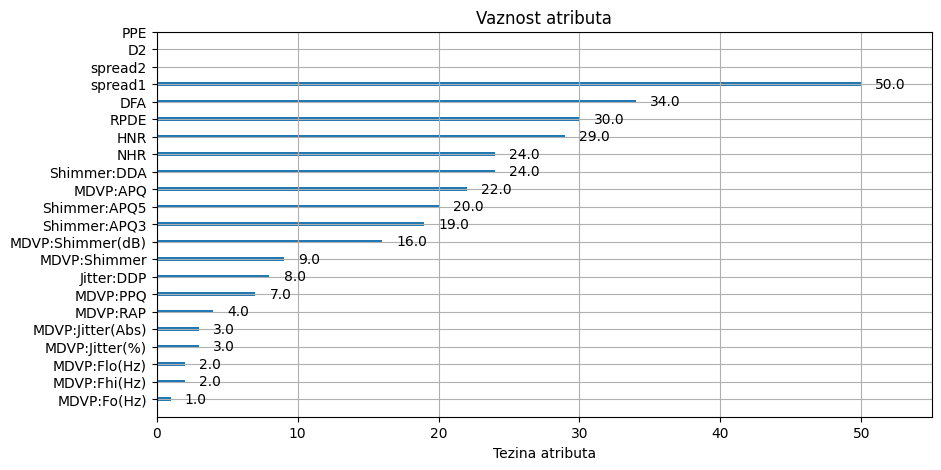

In [21]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
xgb.plot_importance(best_model, ax= ax, xlabel='Importance of attributes', ylabel=None, title='Vaznost atributa')
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(X.keys())
plt.show()

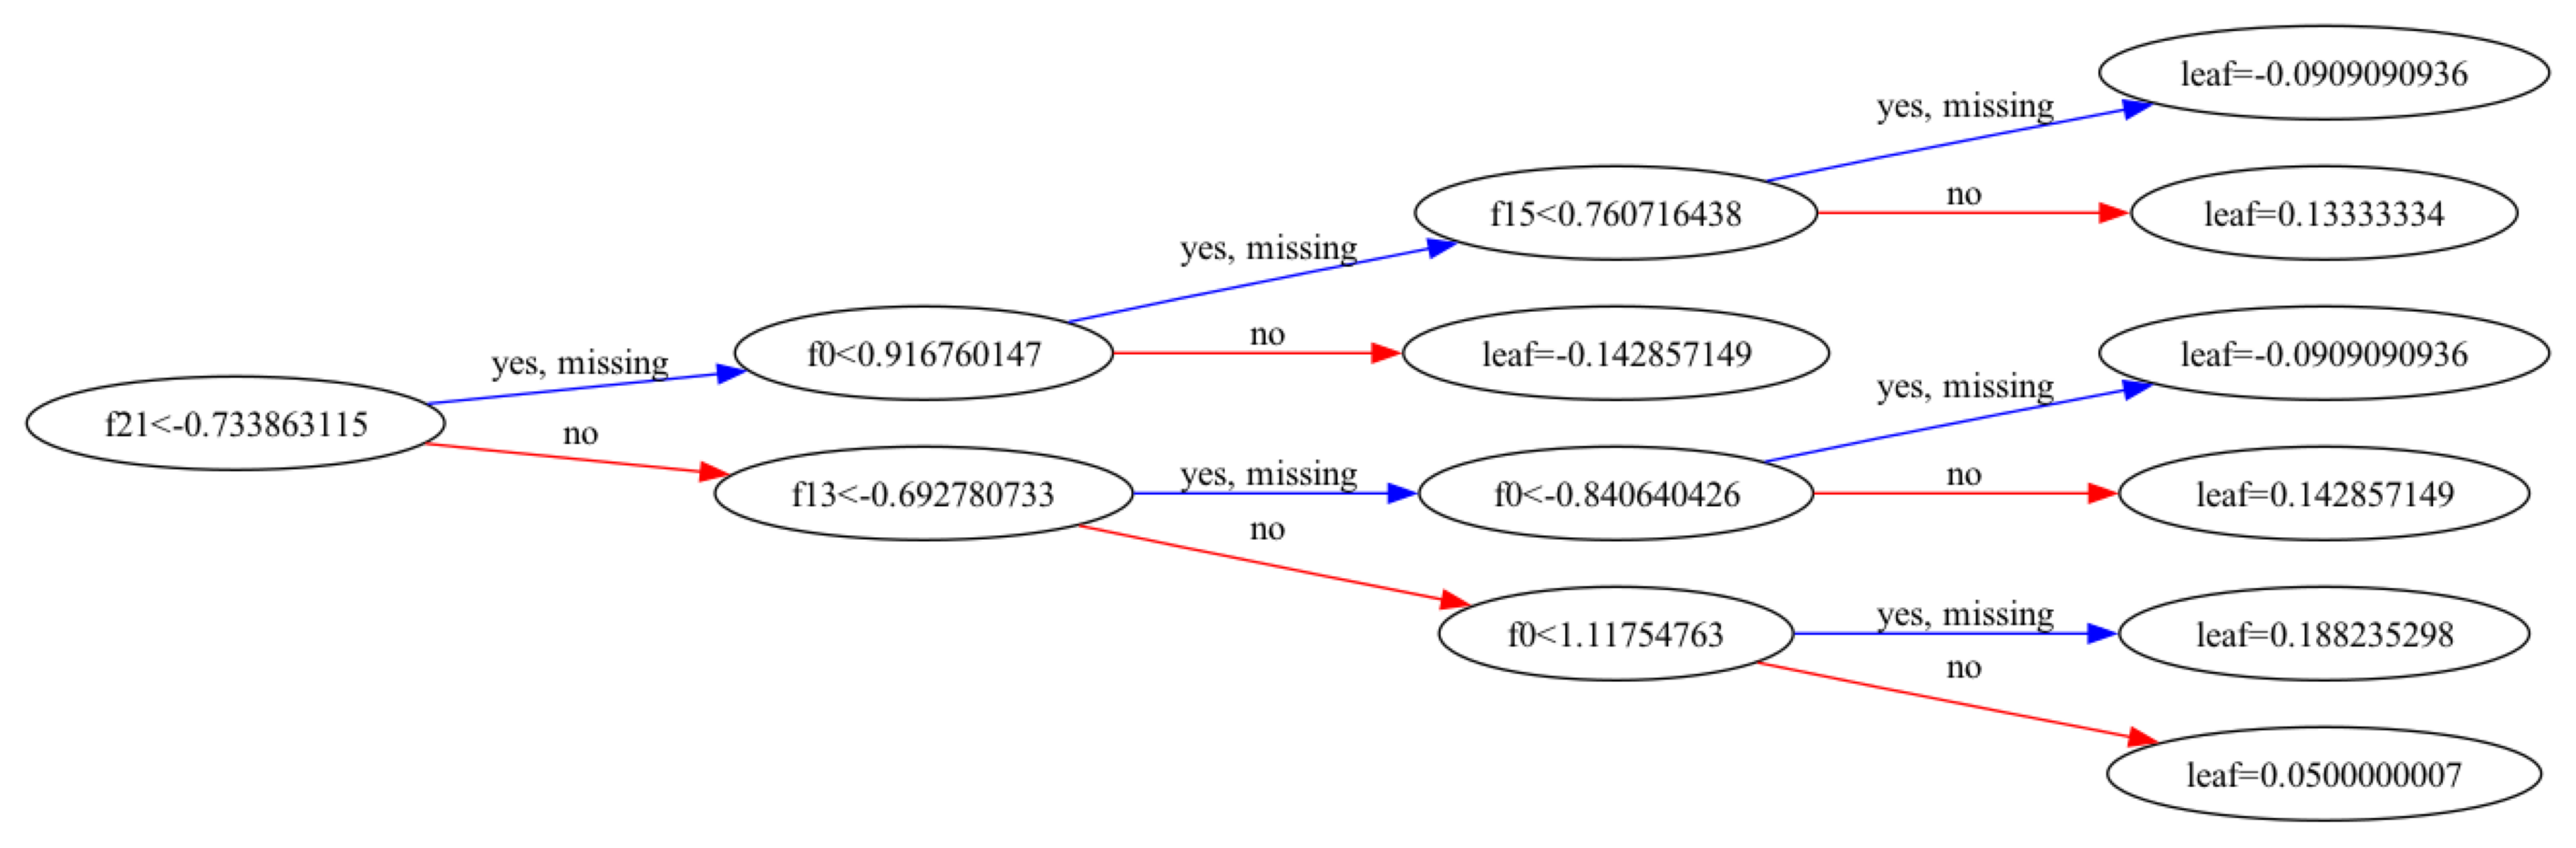

In [28]:
# Visualizing model with graphviz library

plt.figure(figsize=(20, 15), dpi=180)
ax = plt.subplot(1, 1, 1)
xgb.plot_tree(best_model, ax=ax, rankdir='LR')
plt.show()